# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [11]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

In [12]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='0061e663f067480d88f5d0b881de99bb')




In [13]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bit_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2020-12-01',
                                      to='2018-12-12',
                                      language='en',
                                      
                                      
                                      page=4)

In [14]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q='ethereum',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2020-12-01',
                                      to='2019-12-12',
                                      language='en',
                                      
                                      page=2)

In [15]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bit_sentiments = []

for article in bit_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()




,text,compound,positive,negative,neutral
0,"The end is in sight for Quibi, PayPal adds cry...",0.9887,0.094,0.018,0.888
1,"Fred traded bitcoin, ether and a handful of ot...",0.9937,0.099,0.042,0.859
2,"Atrium, the legal startup co-founder by Justin...",0.9935,0.111,0.023,0.866
3,Web browser Brave is expanding its cryptocurre...,0.9913,0.159,0.000,0.841
4,Image copyrightGetty Images\r\nThe Long Island...,0.9994,0.156,0.061,0.783


In [16]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []


for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()




,text,compound,positive,negative,neutral
0,"The end is in sight for Quibi, PayPal adds cry...",0.9887,0.094,0.018,0.888
1,Some Libra Association members like Andreessen...,0.9955,0.098,0.030,0.872
2,When Dfinity raised $102 million in funding in...,0.9936,0.069,0.015,0.916
3,"When the inventor of AWS Lambda, Tim Wagner, a...",0.9909,0.083,0.020,0.897
4,Over the last few weeks all eyes in the crypto...,0.9948,0.105,0.040,0.855


In [17]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bit_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.448425,0.096950,0.049550,0.853500
std,0.761744,0.036157,0.034977,0.037344
min,-0.970200,0.025000,0.000000,0.783000
25%,-0.274575,0.073500,0.022250,0.832750
50%,0.944900,0.096500,0.046500,0.853500
75%,0.986150,0.120500,0.070000,0.869250
max,0.999400,0.159000,0.137000,0.927000


In [18]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.779540,0.082950,0.028550,0.888500
std,0.475029,0.032731,0.020413,0.035732
min,-0.895000,0.038000,0.000000,0.819000
25%,0.815975,0.057000,0.017250,0.868750
50%,0.983400,0.084000,0.026500,0.888500
75%,0.992250,0.099500,0.038500,0.901750
max,0.999200,0.166000,0.087000,0.962000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', article)
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    return tokens


In [22]:
# Create a new tokens column for bitcoin
article = bit_df["text"]
tokenizer(article)

TypeError: expected string or bytes-like object

In [23]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
article = bit_df["text"]
tokenizer(article)

TypeError: expected string or bytes-like object

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])


In [26]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
corpus = bit_df["text"]
bigram_counter(corpus)

,bigram,count
0,"(stock, market)",10
1,"(capital, gain)",8
2,"(jones, industrial)",8
3,"(industrial, average)",8
4,"(capital, loss)",6
5,"(last, year)",5
6,"(coinbase, card)",5
7,"(dow, jones)",5
8,"(cloud, index)",4
9,"(lilinasdaq, composite)",4


In [27]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
corpus = eth_df["text"]
bigram_counter(corpus)

,bigram,count
0,"(internet, computer)",11
1,"(bitcoin, ethereum)",10
2,"(crypto, asset)",10
3,"(financial, system)",9
4,"(digital, currency)",9
5,"(ha, raised)",8
6,"(buy, sell)",7
7,"(andreessen, horowitz)",6
8,"(raised, million)",5
9,"(global, financial)",5


In [28]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
tokens = bit_df['text']
token_count(tokens, N=10)

[('The end is in sight for Quibi, PayPal adds cryptocurrency support and Netflix tests a new promotional strategy. This is your Daily Crunch for October 21, 2020.\r\nThe big story: Quibi is shutting down\r\nThe much-hyped streaming video app led by Jeffrey Katzenberg and Meg Whitman, which raised nearly $2 billion in funding, is shutting down, according to reports in The Information and The Wall Street Journal.\r\nKatzenberg, a longtime Hollywood executive, had blamed the coronavirus pandemic for a lackluster launch in May an app designed for on-the-go viewing didn’t have much appeal when people were largely stuck at home. And whatever the reason, none of Quibi’s shows ever became a breakout hit.\r\nQuibi executives confirmed the news in a post on Medium.\r\nThe tech giants\r\nPayPal to let you buy and sell cryptocurrencies in the US \xa0In partnership with Paxos, PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Litecoin at first.\r\nFacebook is working on Neighborhoods, a N

In [30]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

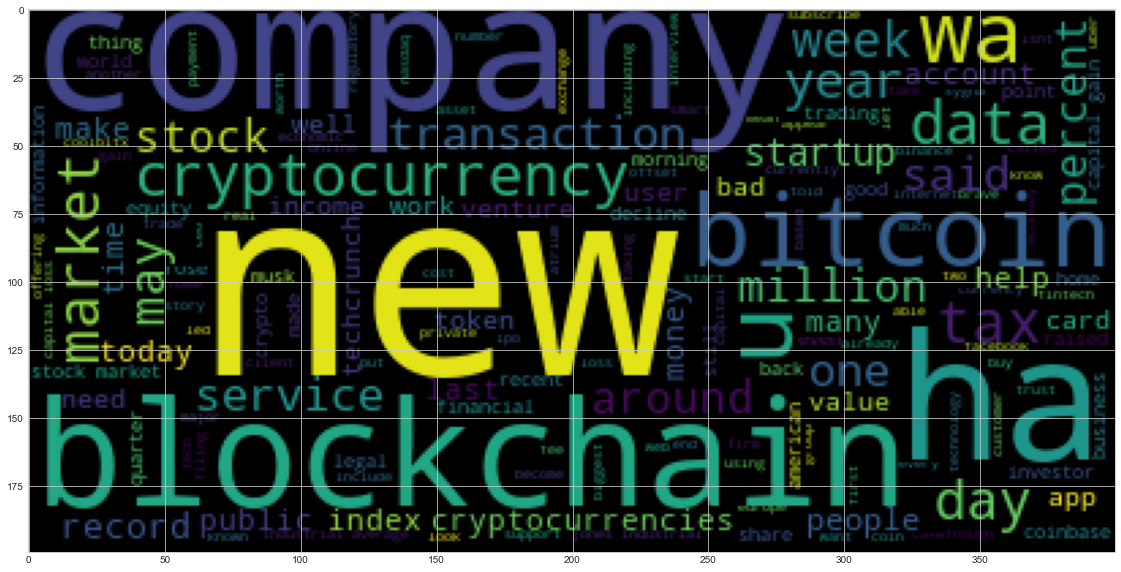

In [32]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
corpus = bit_df['text']

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

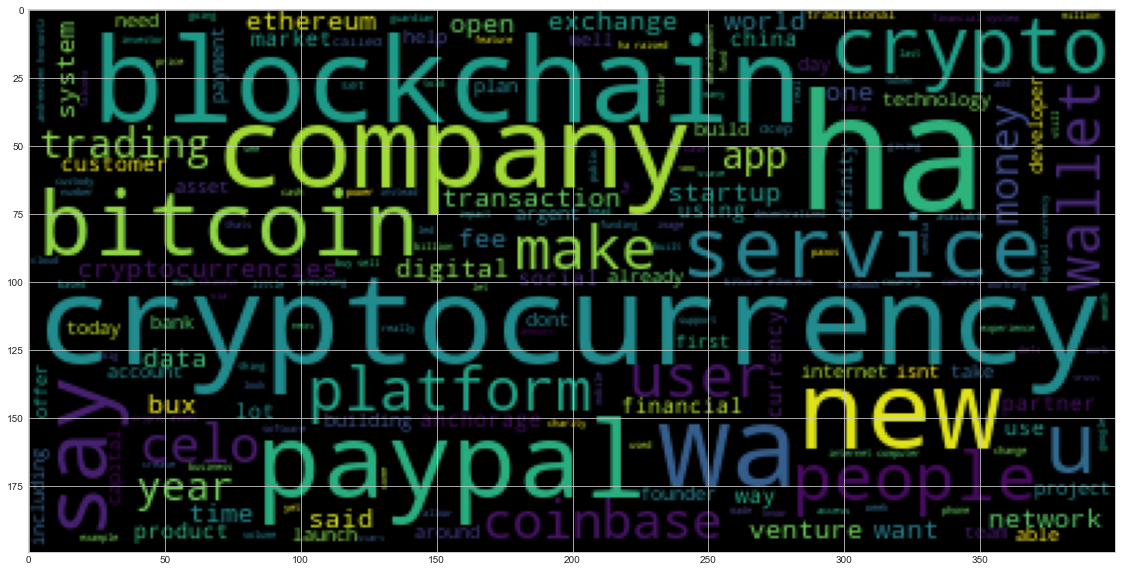

In [33]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
corpus = eth_df['text']

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [38]:
## Bitcoin NER

In [39]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
article = eth_df["text"].str.cat()
article

'The end is in sight for Quibi, PayPal adds cryptocurrency support and Netflix tests a new promotional strategy. This is your Daily Crunch for October 21, 2020.\r\nThe big story: Quibi is shutting down\r\nThe much-hyped streaming video app led by Jeffrey Katzenberg and Meg Whitman, which raised nearly $2 billion in funding, is shutting down, according to reports in The Information and The Wall Street Journal.\r\nKatzenberg, a longtime Hollywood executive, had blamed the coronavirus pandemic for a lackluster launch in May an app designed for on-the-go viewing didn’t have much appeal when people were largely stuck at home. And whatever the reason, none of Quibi’s shows ever became a breakout hit.\r\nQuibi executives confirmed the news in a post on Medium.\r\nThe tech giants\r\nPayPal to let you buy and sell cryptocurrencies in the US \xa0In partnership with Paxos, PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Litecoin at first.\r\nFacebook is working on Neighborhoods, a Nex

In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article)
# Add a title to the document
# YOUR CODE HERE!

In [41]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [42]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Hollywood', 'US', 'Calgary', 'Canada', 'India', 'the United States', 'US', 'Dattos', 'US', 'Us', 'Mobile', 'Coinplug', 'Cryptio', 'Cryptobuyer', 'Laboratoria', 'Metadium', 'Davos', 'Bronze', 'LinkedIn', 'Switzerland', 'LinkedIn', 'Salesforce', 'Switzerland', 'LinkedIn', 'U.S.', 'China', 'China', 'China', 'China', 'Beijing', 'China', 'China', 'US', 'Beijing', 'China', "the United States'", 'The United States', 'China', 'Bitfool', 'China', 'US', 'China', 'China', 'China', 'America', 'China', 'China', 'America', 'China', 'Beijing', 'US', 'China', 'US', 'China', 'Hong Kong', 'Anchorage', 'Anchorage', 'Anchorage', 'Docker', 'Anchorage', 'China', 'Ethereum', 'US', 'Amsterdam', 'U.K.', 'US', 'U.S.', 'New York', 'U.S.', 'India', 'India', 'India', 'India', 'India', 'US', 'US', 'Singapore', 'Sparrow', 'Cambridge', 'Massachusetts', 'US', 'UK', 'Fitbit', 'London', 'US', 'UK', 'DeFi', 'U.S.', 'U.S.', 'U.S.', 'U.S.']


---

## Ethereum NER

In [47]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
article = bit_df["text"].str.cat()

In [48]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(article)
# Add a title to the document
# YOUR CODE HERE!

In [49]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [50]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Hollywood', 'US', 'Calgary', 'Canada', 'India', 'the United States', 'US', 'Dattos', 'US', 'Us', 'Gemini', 'U.S.', 'U.S', 'U.S', 'America', 'U.S.', 'Braves', 'Long Island Iced Tea', "the Long Island Iced Tea Company's", 'Ireland', 'Webvan', 'China', 'China', 'U.S.', 'Cisco', 'U.K.', 'U.S.', 'U.S.', 'Fremont', 'California', 'Grimes', 'the United States', 'US', 'Shanghai', 'London', 'US', 'China', 'the United States', 'U.S.', 'U.S.', 'U.S.', 'Saudi Arabia', 'Russia', 'Accolade', 'Newton', 'Hollywood', 'London', 'U.K.', 'Taiwan', 'Coincheck', 'U.S.', 'Israel', 'Illinois', 'US', 'San Francisco']
